<a href="https://colab.research.google.com/github/JCruzJorge/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_CruzJorge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: (Prediction of Product Sales)

Author : Jorge Cruz

## "Project Overview"

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df2 = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning

How many rows/columns:

In [ ]:
df.shape

(8523, 12)

Checking the data types:

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- We will drop the `Unnamed: 0` column since this column is a repeating of the index.
- We will then check `df.info()` again to make sure that the column is dropped.

### Duplicated Data
Checking for duplicated data:

In [ ]:
df.duplicated().sum()

0

- There are 32 duplicates in the dataset which we will drop.

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

- Checking to make sure duplicates were dropped.

### Missing Values
Checking for missing values:

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Identifying % of missing data
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Missing Values:
  - There are `1463` missing values in the `Item_Weight` column. (17.2%)
  - There are `2410` missing values in the `Outlet_Size` column. (28.3%)

We chose these two values due to inconsistent and missing data, which requires additional EDA.

### Fixing Data Types

- We will now address the data types and make sure that they match the data dictionary.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [ ]:
pd.set_option('display.max_rows', None)
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#df['Outlet_Size'] = df['Outlet_Size'].astype('int64')

In [ ]:
for col in df:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Streaming output truncated to the last 5000 lines.
188.5188    1
170.1764    1
255.8356    1
231.0300    1
174.8738    1
182.0950    1
51.4008     1
187.8214    1
45.5402     1
119.6782    1
196.4426    1
56.3614     1
54.3614     1
250.8724    1
144.5444    1
107.6938    1
45.5086     1
43.6454     1
256.6672    1
126.0020    1
51.0692     1
192.9136    1
259.9278    1
126.5046    1
178.1002    1
153.3024    1
265.2226    1
196.8794    1
141.5154    1
117.0492    1
106.1622    1
194.5110    1
180.0344    1
246.9144    1
87.3514     1
116.0492    1
60.5852     1
90.8172     1
118.7782    1
104.6280    1
140.2154    1
81.5934     1
45.7402     1
107.3622    1
39.7164     1
32.9900     1
96.0726     1
130.0626    1
260.0936    1
152.1340    1
79.7644     1
181.9292    1
170.4764    1
79.9618     1
132.1284    1
251.3724    1
42.7112     1
227.6062    1
229.0668    1
179.3976    1
75.3670     1
262.4910    1
152.0340    1
125.9704    1
171.8764    1
41.5796     1
96.3410     1
110.9202   

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### Inspecting Categorical Columns & Addressing Inconsistent Values

- We will now use a filter to create a for loop that loops through all of the object type columns so that we can inspect them further.

In [ ]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
FDV38     9
NCF42     9
FDT07     9
FDW26     9
NCL31     9
FDU12     9
FDG09     9
FDQ40     9
FDX20     9
NCI54     9
FDX31     9
FDP25     9
FDW49     9
FDF56     9
FDO19     9
DRN47     9
NCB18     9
FDE11     8
NCX05     8
FDQ39     8
FDT55     8
FDO32     8
FDT40     8
FDZ20     8
FDH27     8
FDY49     8
FDS33     8
FDR04     8
FDR43     8
FDR59     8
FDJ55     8
FDT24     8
FDY55     8
FDV09     8
FDU23     8
FDY47     8
DRD25     8
FDK58     8
FDL58     8
FDX58     8
FDR44     8
FDP28     8
FDA39     8
FDH28     8
DRF27     8
FDX21     8
FDY56     8
FDF05     8
FDL20     8
FDY03     8
NCK05     8
FDS55     8
DRA59     8
FDG24     8
NCE54     8
FDZ21     8
FDA04     8
FDW24     8
FDT49     8
DRF23     8
FDD05     8
FDH10     8
FDX50     8
FDT32     8
FDK20     8
FDU13     8
FDN56     8
FDZ26     8
FDL34     8
DRF01     8
FDG38     8
NCE31    

In [ ]:
Item_Content = {'LF':'Low Fat',
                   'low fat':'Low Fat', 'reg':'Regular'}

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(Item_Content)

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Summary Statistics for Numeric Features

In [ ]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [ ]:
stats =  df.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Project 1 - Part 3

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

Please feel free to add more than the minimum. Remember this is your chance to display your skills!

## Exploratory Visuals & Analysis

- Note: There are many different ways students could tackle this EDA. Additionally, there are more advanced ways to plot the data.

- Approaches
We will go Column-by-Column with the EDA using a function (plus markdown interpretations for each)

In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
9.300     68
10.500    66
16.700    66
19.350    63
20.700    62
16.000    62
9.800     61
17.700    60
17.750    60
18.850    59
15.850    59
15.000    59
16.750    58
18.250    58
19.600    58
15.700    57
9.195     56
12.500    56
20.200    53
12.100    53
12.600    53
10.195    53
15.600    52
13.500    51
11.500    51
19.700    50
11.600    50
20.250    50
12.350    50
12.850    49
9.600     49
12.300    49
9.500     49
13.150    49
17.850    48
20.350    47
14.000    47
15.500    47
15.200    46
16.500    46
16.350    46
17.250    45
14.500    44
20.500    44
19.000    44
10.100    44
9.000     44
18.200    43
10.000    43
10.300    43
16.200    43
11.100    42
13.350    42
19.100    41
17.500    41
14.150    41
16.100    41
13.000    40
15.350    40
20.750    39
19.850    39
19.200    39
11.650    39
13.100    39
18.000    38
20.600    38
18.700    38
18.350    37
18.600    37
17.350    37
17.100    36
12.650    36

In [ ]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

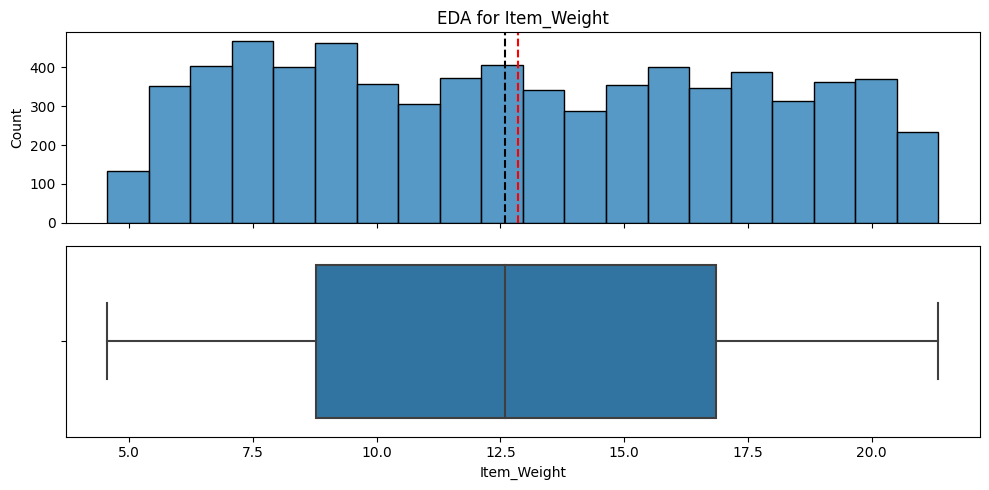

In [ ]:
plot_numeric(df,'Item_Weight')

In [ ]:
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

<ipython-input-27-9109d13ca073>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-27-9109d13ca073>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


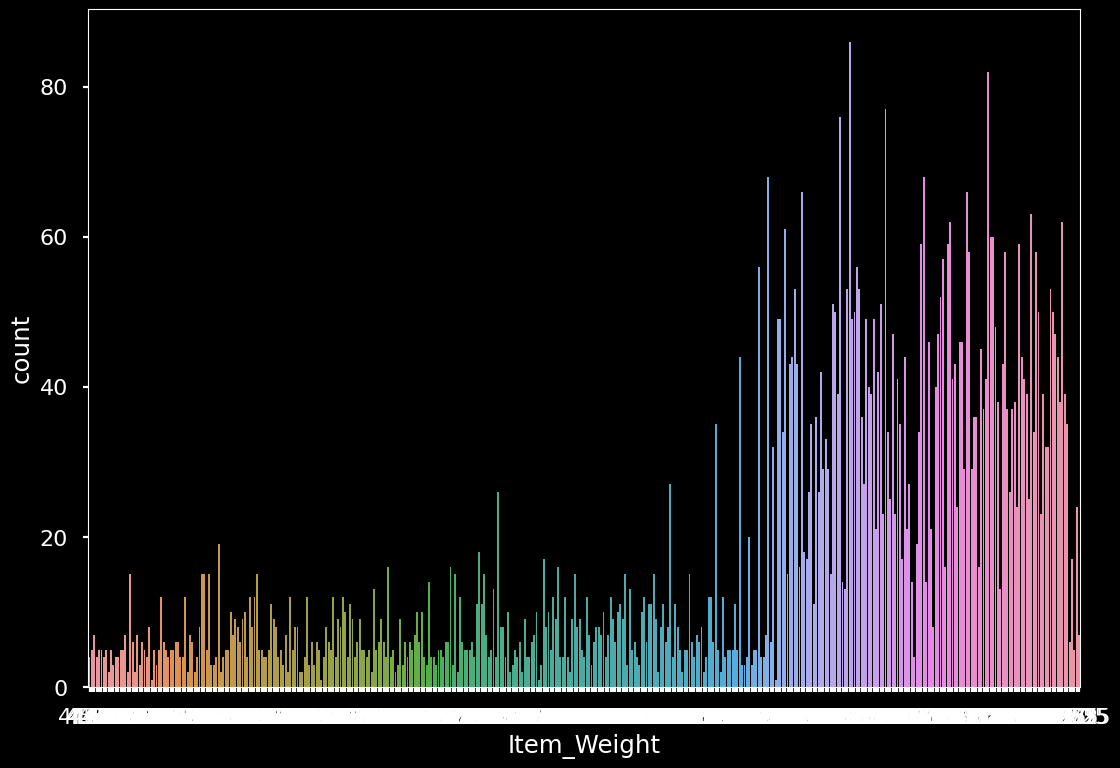

In [ ]:
ax = sns.countplot(data = df, x = 'Item_Weight');

In [ ]:
fig, ax = bar_plot(df, 'Item_Weight', 'Item Weight');
print(df['Item_Weight'].value_counts())

NameError: ignored

 - This graph shows that there are over 250 senior level executives while there are less than 25 expert level executives.
  - `Strategy #1`: To deal with the missing values, we could simply `drop` the missing values.
  - `Strategy #2`: To deal with the missing values, we could fill them in with the `most frequent` for this feature.
  - `Strategy #3`: To deal with the missing values, we could fill them in with the word `Unknown` for this feature.

- Filling in the `Item_Weight` column with the word `Unknown`.

In [ ]:
df['Item_Weight'] = df['Item_Weight'].fillna(value = 'Unknown')

In [ ]:
df['Item_Weight'].value_counts()

In [ ]:
df.isna().sum()

- This histogram shows that the majority of the salaries are around $100,000.

  - `Strategy #1`: To deal with the missing values, we could simply `drop` the missing values.
  - `Strategy #2`: To deal with the missing values, we could fill them in with the `most frequent` for this feature.
  - `Strategy #3`: To deal with the missing values, we could fill them in with the `median/mean value` for this feature.

In [ ]:
print(df['Outlet_Size'].mean())
print(df['Outlet_Size'].median())

- After further investigation, looks like the `mean` value would be about
`$110,239.92` while the `median` value would be `$100,000`.
  - Since most of the values in the histogram above are around `$100,000`, I will choose to fill in the values with the `median`.

Filling in the salary_in_usd column with the median value.

In [ ]:
median_value = df['Outlet_Size'].median()
df['Outlet_Size'] = df['Outlet_Size'].fillna(median_value)

- Checking to make sure the values for the `Outlet_Size` column were filled in.

In [ ]:
df.isna().sum()